1. How would you define clustering? Can you name a few clustering algorithms?

clustering is grouping similar data instances together and ensuring the disimialar ones are seprated into different clusters. few clustering algos -> kmeans, DBSCAN, agglomerative, BIRCH reduction, Mean shift, spectral clsutering

2. What are some of the main applications of clustering algorithms?

image segmentation, anomaly detection, novelty detection, semisupervised learning, preprocessing

3. Describe two techniques to select the right number of clusters when using
K-Means.

elbow method -> plot inertia for different number of clusters when it stedies the arch of curve(elbow) is the right k. 
silhoute score method -> minimize the relation between the cluster the data instance is alotted to (intera cluster) and maximize its relation with the nearby cluster (inter cluster)

4. What is label propagation? Why would you implement it, and how?

Labeling a dataset is costly and time-consuming. Therefore, it is common to have
plenty of unlabeled instances, but few labeled instances. Label propagation is a
technique that consists in copying some (or all) of the labels from the labeled
instances to similar unlabeled instances. This can greatly extend the number of
labeled instances, and thereby allow a supervised algorithm to reach better performance
(this is a form of semi-supervised learning). One approach is to use a
clustering algorithm such as K-Means on all the instances, then for each cluster
find the most common label or the label of the most representative instance (i.e.,
the one closest to the centroid) and propagate it to the unlabeled instances in the
same cluster

5. Can you name two clustering algorithms that can scale to large datasets? And
two that look for regions of high density?

scale to large Kmeans, BIRCH. regions of high density -> DBSCAN, meanshift

6. Can you think of a use case where active learning would be useful? How would
you implement it?

<span style="color:red;">Active learning is useful whenever you have plenty of unlabeled instances but
labeling is costly. In this case (which is very common), rather than randomly
selecting instances to label, it is often preferable to perform active learning,
where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them. A common approach is
uncertainty sampling </span>

7. What is the difference between anomaly detection and novelty detection?

anomaly detecting in a data set not known to be good or bad (clean or not). novelty assumes the training set to be originlay clean and finds new instacnes to be either belonging to that clean daa or not <span style="color:red;">Some algorithms work best for anomaly detection (e.g., Isolation Forest), while
others are better suited for novelty detection (e.g., one-class SVM).</span>

8. What is a Gaussian mixture? What tasks can you use it for?

Gaussiona mixture is a dataset with instances ranomly sampled from one or more gassian mixture. <span style="color:red;">the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters
may have different ellipsoidal shapes, sizes, orientations, and densities), and
we don’t know which cluster each instance belongs to.</span> Use it for Density estimation, anomaly detection and novelty detection

9. Can you name two techniques to find the right number of clusters when using a
Gaussian mixture model?

Bayesian information criterion (BIC) and Akaike information
criterion (AIC)

10. The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of
faces. Each image is flattened to a 1D vector of size 4,096. 40 different people
were photographed (10 times each), and the usual task is to train a model that
can predict which person is represented in each picture. Load the dataset using
the sklearn.datasets.fetch_olivetti_faces() function, then split it into a
training set, a validation set, and a test set (note that the dataset is already scaled
between 0 and 1). Since the dataset is quite small, you probably want to use stratified
sampling to ensure that there are the same number of images per person in
each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).
Visualize the clusters: do you see similar faces in each cluster?

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Abhishek\scikit_learn_data


In [3]:
print(olivetti_faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
data = olivetti_faces.data
targets = olivetti_faces.target

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
ssp = StratifiedShuffleSplit(test_size=40, random_state=24)

In [18]:
data.shape, targets.shape

((400, 4096), (400,))

In [19]:
train_idx, test_idx = next(ssp.split(data, targets))
x_train = data[train_idx]
y_train = targets[train_idx]
x_test = data[test_idx]
y_test = targets[test_idx]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(360, 4096)
(360,)
(40, 4096)
(40,)


In [20]:
train_idx, val_idx = next(ssp.split(x_train, y_train))
x_train_f = x_train[train_idx]
y_train_f = y_train[train_idx]
x_val = x_train[val_idx]
y_val = y_train[val_idx]

print(x_train_f.shape)
print(y_train_f.shape)
print(x_val.shape)
print(y_val.shape)

(320, 4096)
(320,)
(40, 4096)
(40,)


In [22]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(x_train_f)
X_valid_pca = pca.transform(x_val)
X_test_pca = pca.transform(x_test)

pca.n_components_

220

In [23]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


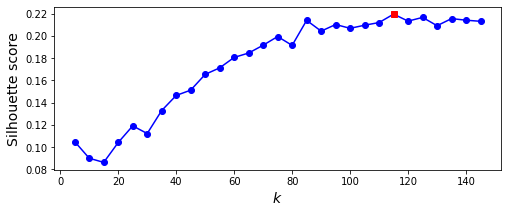

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [28]:
best_k

115

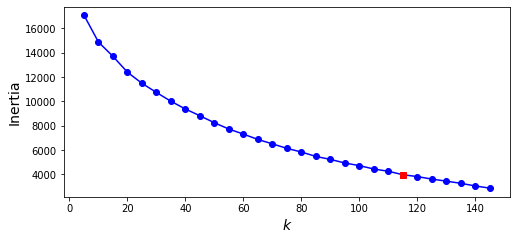

In [29]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [30]:
best_model = kmeans_per_k[best_index]

Cluster 0


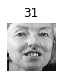

Cluster 1


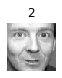

Cluster 2


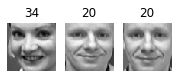

Cluster 3


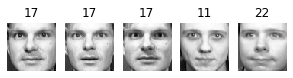

Cluster 4


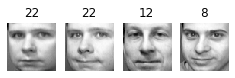

Cluster 5


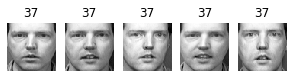

Cluster 6


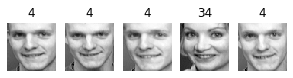

Cluster 7


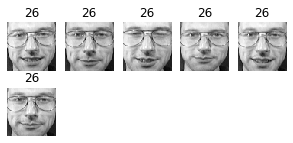

Cluster 8


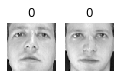

Cluster 9


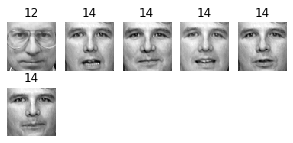

Cluster 10


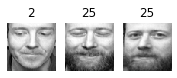

Cluster 11


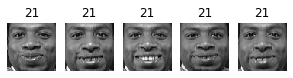

Cluster 12


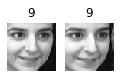

Cluster 13


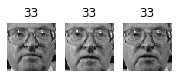

Cluster 14


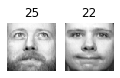

Cluster 15


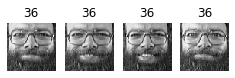

Cluster 16


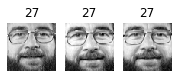

Cluster 17


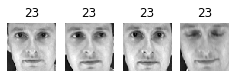

Cluster 18


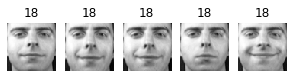

Cluster 19


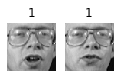

Cluster 20


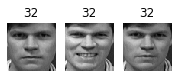

Cluster 21


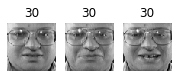

Cluster 22


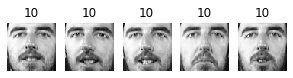

Cluster 23


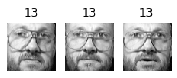

Cluster 24


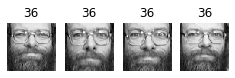

Cluster 25


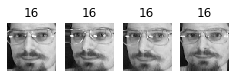

Cluster 26


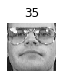

Cluster 27


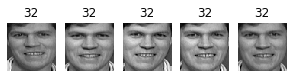

Cluster 28


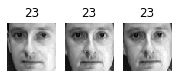

Cluster 29


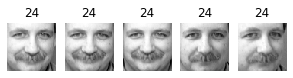

Cluster 30


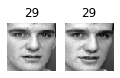

Cluster 31


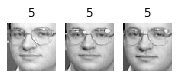

Cluster 32


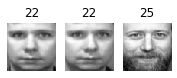

Cluster 33


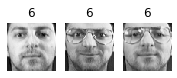

Cluster 34


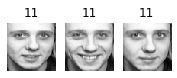

Cluster 35


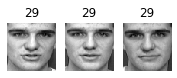

Cluster 36


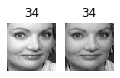

Cluster 37


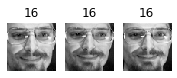

Cluster 38


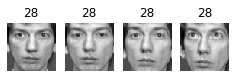

Cluster 39


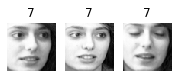

Cluster 40


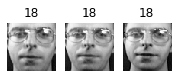

Cluster 41


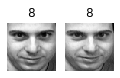

Cluster 42


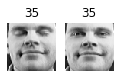

Cluster 43


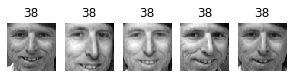

Cluster 44


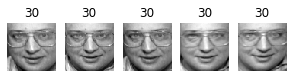

Cluster 45


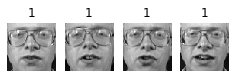

Cluster 46


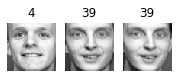

Cluster 47


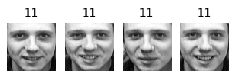

Cluster 48


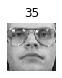

Cluster 49


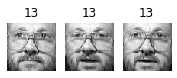

Cluster 50


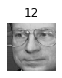

Cluster 51


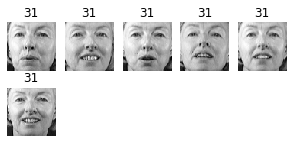

Cluster 52


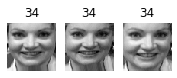

Cluster 53


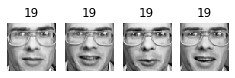

Cluster 54


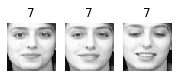

Cluster 55


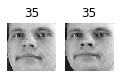

Cluster 56


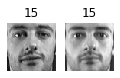

Cluster 57


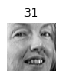

Cluster 58


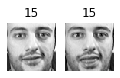

Cluster 59


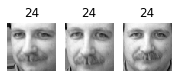

Cluster 60


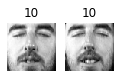

Cluster 61


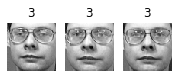

Cluster 62


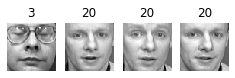

Cluster 63


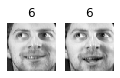

Cluster 64


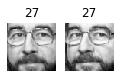

Cluster 65


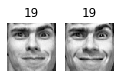

Cluster 66


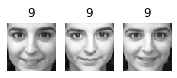

Cluster 67


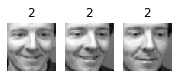

Cluster 68


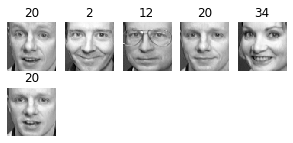

Cluster 69


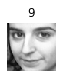

Cluster 70


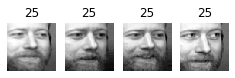

Cluster 71


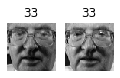

Cluster 72


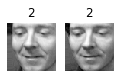

Cluster 73


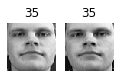

Cluster 74


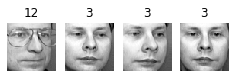

Cluster 75


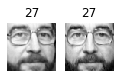

Cluster 76


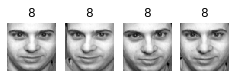

Cluster 77


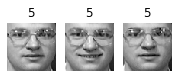

Cluster 78


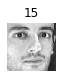

Cluster 79


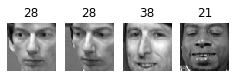

Cluster 80


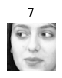

Cluster 81


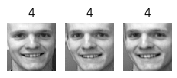

Cluster 82


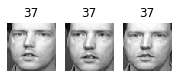

Cluster 83


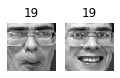

Cluster 84


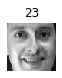

Cluster 85


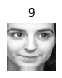

Cluster 86


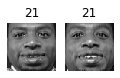

Cluster 87


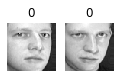

Cluster 88


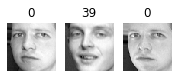

Cluster 89


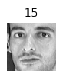

Cluster 90


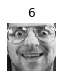

Cluster 91


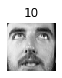

Cluster 92


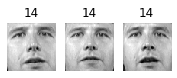

Cluster 93


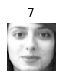

Cluster 94


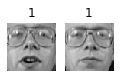

Cluster 95


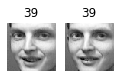

Cluster 96


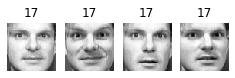

Cluster 97


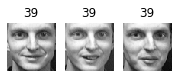

Cluster 98


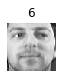

Cluster 99


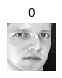

Cluster 100


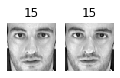

Cluster 101


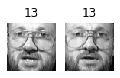

Cluster 102


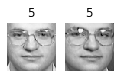

Cluster 103


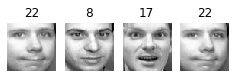

Cluster 104


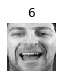

Cluster 105


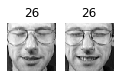

Cluster 106


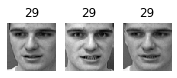

Cluster 107


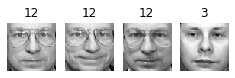

Cluster 108


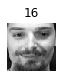

Cluster 109


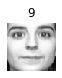

Cluster 110


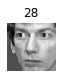

Cluster 111


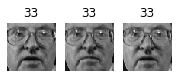

Cluster 112


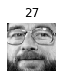

Cluster 113


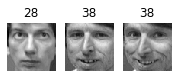

Cluster 114


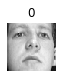

In [32]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = x_train_f[in_cluster].reshape(-1, 64, 64)
    labels = y_train_f[in_cluster]
    plot_faces(faces, labels)

About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

11. Continuing with the Olivetti faces dataset, train a classifier to predict which person
is represented in each picture, and evaluate it on the validation set. Next, use
K-Means as a dimensionality reduction tool, and train a classifier on the reduced
set. Search for the number of clusters that allows the classifier to get the best performance:
what performance can you reach? What if you append the features
from the reduced set to the original features (again, searching for the best number
of clusters)?

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train_f)
clf.score(X_valid_pca, y_val)

0.975

In [36]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train_f)
    
clf.score(X_valid_reduced, y_val)

0.85

In [38]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=n_clusters)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train_f)
    print(n_clusters, pipeline.score(X_valid_pca, y_val))

5 0.45
10 0.675
15 0.675
20 0.725
25 0.725
30 0.8
35 0.825
40 0.775
45 0.875
50 0.825
55 0.825
60 0.825
65 0.9
70 0.825
75 0.825
80 0.85
85 0.825
90 0.825
95 0.825
100 0.85
105 0.8
110 0.825
115 0.825
120 0.825
125 0.875
130 0.9
135 0.875
140 0.875
145 0.8


In [39]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [44]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train_f)
clf.score(X_valid_extended, y_val)

0.9

12. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the
algorithm, you should probably reduce the dataset’s dimensionality (e.g., use
PCA, preserving 99% of the variance). Use the model to generate some new faces
(using the sample() method), and visualize them (if you used PCA, you will need
to use its inverse_transform() method). Try to modify some images (e.g.,
rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare
the output of the score_samples() method for normal images and for anomalies).

In [45]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [46]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

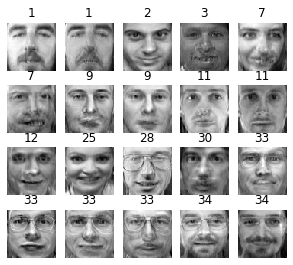

In [47]:
plot_faces(gen_faces, y_gen_faces)

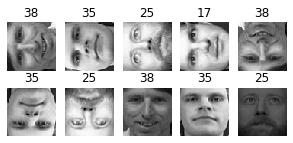

In [49]:
n_rotated = 4
rotated = np.transpose(x_train_f[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train_f[:n_rotated]

n_flipped = 3
flipped = x_train_f[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train_f[:n_flipped]

n_darkened = 3
darkened = x_train_f[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train_f[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [50]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [51]:
gm.score_samples(X_bad_faces_pca)

array([-2.73398872e+07, -4.10036551e+07, -2.86271362e+07, -4.19757032e+07,
       -2.67769483e+07, -5.04076773e+07, -3.24330691e+07, -1.03955137e+08,
       -8.21287006e+07, -7.43519509e+07])

In [52]:
gm.score_samples(X_train_pca[:10])

array([1230.59195066, 1241.33241114, 1181.37657064, 1250.18324714,
       1189.13919032, 1245.37137118, 1295.57954703, 1189.13918296,
       1181.37656687, 1221.28498669])

13. Some dimensionality reduction techniques can also be used for anomaly detection.
For example, take the Olivetti faces dataset and reduce it with PCA, preserving
99% of the variance. Then compute the reconstruction error for each image.
Next, take some of the modified images you built in the previous exercise, and
look at their reconstruction error: notice how much larger the reconstruction
error is. If you plot a reconstructed image, you will see why: it tries to reconstruct
a normal face.

In [53]:
X_train_pca

array([[ 9.109245  , -0.20655072, -0.74000555, ...,  0.12092225,
         0.15795082, -0.08618133],
       [-2.2668965 ,  4.3107142 , -2.2800717 , ..., -0.15450592,
        -0.1429261 , -0.2491772 ],
       [-5.1331997 , -0.7020698 ,  0.87839764, ...,  0.07466324,
        -0.32073733,  0.23175374],
       ...,
       [-0.86257577,  0.0918642 , -6.193918  , ..., -0.1291694 ,
         0.20173293, -0.03277978],
       [-3.2122228 , -2.0681455 ,  0.30174708, ...,  0.2606624 ,
        -0.21346048, -0.07506242],
       [ 3.907454  , -1.4262317 , -4.4766693 , ...,  0.1456365 ,
        -0.03144016,  0.2321461 ]], dtype=float32)

In [54]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [56]:
reconstruction_errors(pca, x_train_f).mean()

0.00019221313

In [57]:
reconstruction_errors(pca, X_bad_faces).mean()

0.004168819

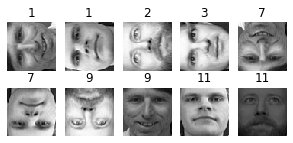

In [58]:
plot_faces(X_bad_faces, y_gen_faces)

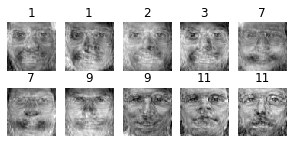

In [59]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)